In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("diabetes.csv")

In [47]:

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='BloodPressure', ylabel='Density'>

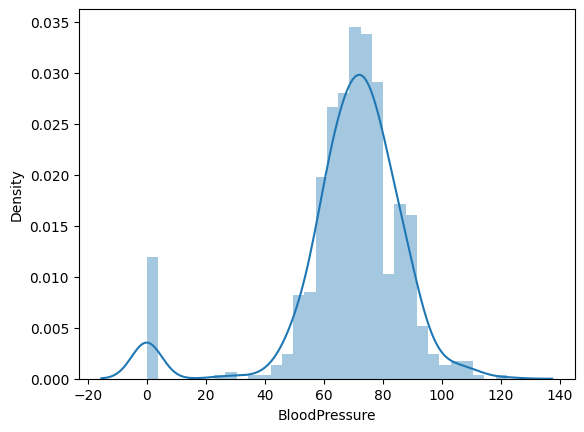

In [50]:
sns.distplot(df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

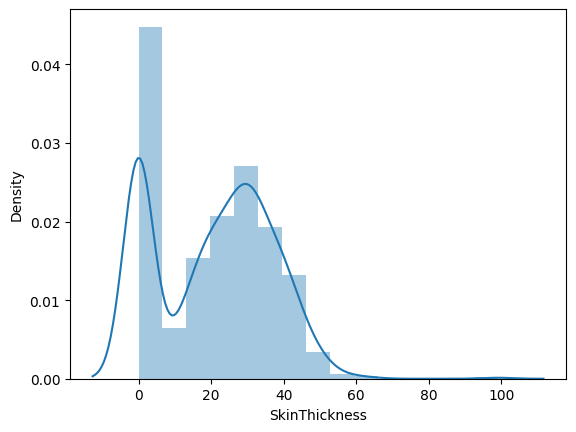

In [51]:
sns.distplot(df['SkinThickness'])

<Axes: xlabel='Age', ylabel='Density'>

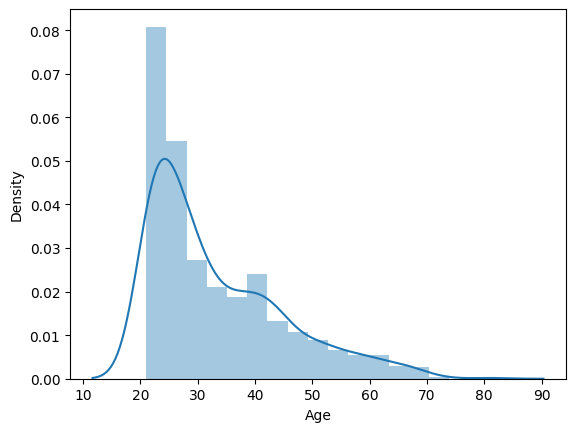

In [52]:
sns.distplot(df['Age'])

### Dividing test and training samples

In [53]:
from sklearn.model_selection import train_test_split

X = df[['BloodPressure', 'SkinThickness', 'Age']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

Train decision tree

In [54]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=2, 
        min_samples_split=2, 
        min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

Use trained classifier to predict

In [55]:
y_preds = clf.predict(X_test)

In [56]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.6169
Precision 0.4756
Recall 0.7091
F1 0.5693


- Accuracy - 60% of the time tama yung prediction kung may diabetes ba sila
- Precision - 47% of the time siya tama
- Recall - 70% - out of all the people, we were able to predict
- F1 - average of precision and recall

[Text(0.5, 0.8333333333333334, 'Age <= 28.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]\nclass = No Diabetes'),
 Text(0.25, 0.5, 'SkinThickness <= 31.5\nentropy = 0.694\nsamples = 300\nvalue = [244, 56]\nclass = No Diabetes'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.558\nsamples = 223\nvalue = [194, 29]\nclass = No Diabetes'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.935\nsamples = 77\nvalue = [50, 27]\nclass = No Diabetes'),
 Text(0.75, 0.5, 'Age <= 62.5\nentropy = 1.0\nsamples = 314\nvalue = [157, 157]\nclass = No Diabetes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.999\nsamples = 298\nvalue = [144, 154]\nclass = Diabetes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.696\nsamples = 16\nvalue = [13, 3]\nclass = No Diabetes')]

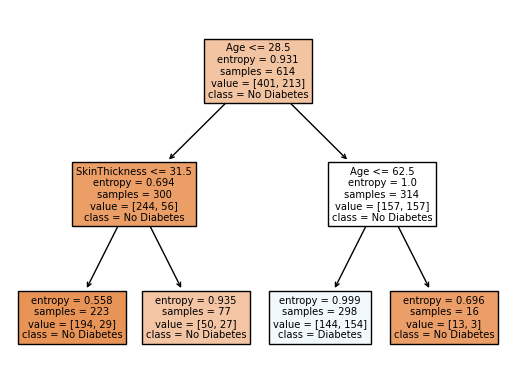

In [60]:
plot_tree(clf, 
          feature_names = list(X.columns),
          class_names = ['No Diabetes', 'Diabetes'],
          filled = True)